<a href="https://colab.research.google.com/github/AkankshaB123/python/blob/main/D1_Draft_Grab_Payments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective/Hypothesis
1. Explore friction areas impacting payment competions/conversion rate (56%)
2. Identify growth opportunities for payment completions
3. EDA for other patterns

In [98]:
payments['status_explained'].value_counts()/len(payments)*100

,count
status_explained,
Completed,55.7
Declined,44.3


In [2]:
import pandas as pd

In [19]:
!pip install --upgrade gspread google-auth
from google.colab import auth
auth.authenticate_user()  # follow the link & paste the code


In [24]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1DDcWbTMJ5OxhOa3aODQ43fYQc0K_6Yhj/export?format=xlsx"
payments = pd.read_excel(url)

payments.head()


,currency,user_id,Amount,provider,provider_tx_id,created_at,updated_at,status,status_explained,error_msg,...,links_card_issuing_bank,links_card_issuing_country_code,threeds_liability_shift,is_rerouted,is_scheme_token,psp_account,transaction_country,is_dine_in,is_auto,transaction_date
0,SGD,14593219,4.532,grablink,2507011957560100151275,2025-07-01 19:57:56,2025-07-01 19:57:58,2,Completed,NaN,...,DBS Bank Ltd,SG,0.0,0.0,1.0,GrabSG,Singapore,NaN,Auto,2025-07-01
1,SGD,118581160,1.879,GPC,2032579199sp00000000000000000000,2025-07-01 20:12:06,2025-07-01 20:12:06,2,Completed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN,Auto,2025-07-01
2,SGD,79416616,1.034,GPC,2031248656sp00000000000000000000,2025-07-01 01:12:53,2025-07-01 01:12:54,2,Completed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN,Manual,2025-07-01
3,SGD,201612788,0.320,GPC,2031869944sp00000000000000000000,2025-07-01 08:31:35,2025-07-01 08:31:36,2,Completed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN,Manual,2025-07-01
4,SGD,39238053,1.716,GPC,2031198056sp00000000000000000000,2025-07-01 00:23:27,2025-07-01 00:23:27,2,Completed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN,Auto,2025-07-01


# Univariate Analysis
* 35 columns, not null values no treatment of missing values required


In [34]:
len(payments.columns)

35

Understanding of data
1. Payments data is across how many international currencies & Countries? - 6('Singapore', 'Vietnam', 'Philippines', 'Indonesia', 'Malaysia','Cambodia') but 89% is concentrated across 'SGD' - Singapore
2. Similar trend in amount? - 98% amount is concentrated towards the range: -21.6 to 2160 (**Interesting finding: amount as negative - credit limit concept, need to study this further**)

In [46]:
payments['transaction_country'].value_counts()/len(payments)

,count
transaction_country,
Singapore,0.894
Philippines,0.041
Malaysia,0.041
Vietnam,0.022
Indonesia,0.001
Cambodia,0.001


In [103]:
# Percentage of each status per country
country_status_pct = payments.groupby('transaction_country')['status_explained'].value_counts(normalize=True) * 100

print(country_status_pct)

transaction_country  status_explained
Cambodia             Completed           100.000000
Indonesia            Completed           100.000000
Malaysia             Completed            63.414634
                     Declined             36.585366
Philippines          Completed            65.853659
                     Declined             34.146341
Singapore            Completed            54.362416
                     Declined             45.637584
Vietnam              Completed            72.727273
                     Declined             27.272727
Name: proportion, dtype: float64


In [117]:
pd.cut(payments['Amount'], bins=10).value_counts()/len(df)
#Note there's negative value as well

,count
Amount,
"(-21.6, 2160.0]",0.985
"(2160.0, 4320.0]",0.012
"(8640.0, 10800.0]",0.001
"(12960.0, 15120.0]",0.001
"(19440.0, 21600.0]",0.001
"(4320.0, 6480.0]",0.000
"(10800.0, 12960.0]",0.000
"(6480.0, 8640.0]",0.000
"(15120.0, 17280.0]",0.000


# Bi-variate analysis

Hypothesis:
1. Negative amount is credit based amount (lending money from platform) and unable to pay on time so it's credited - need to explore more date params with which this can be identified

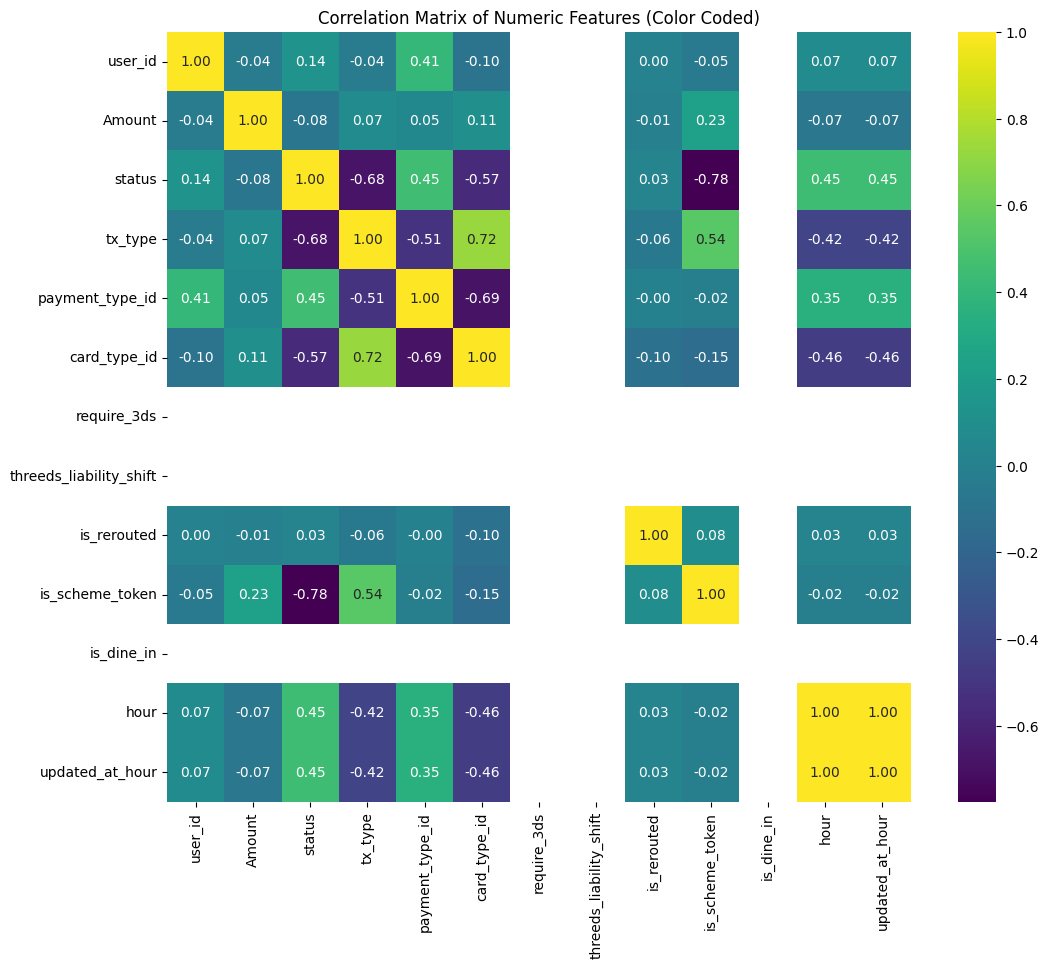

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(payments.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features (Color Coded)')
plt.show()

In [53]:
payments.columns

Index(['currency', 'user_id', 'Amount', 'provider', 'provider_tx_id',
       'created_at', 'updated_at', 'status', 'status_explained', 'error_msg',
       'booking_code', 'tx_type', 'payment_type_id', 'card_type_id',
       'vertical', 'product_type', 'require_3ds', 'route_indicator',
       'payer_reference', 'psp', 'acquirer', 'links_card_scheme',
       'links_card_category', 'links_card_variant',
       'links_card_funding_source', 'links_card_issuing_bank',
       'links_card_issuing_country_code', 'threeds_liability_shift',
       'is_rerouted', 'is_scheme_token', 'psp_account', 'transaction_country',
       'is_dine_in', 'is_auto', 'transaction_date'],
      dtype='object')

In [73]:
payments['Amount'].value_counts()

,count
tx_type,
25,392
66,280
62,227
44,89
104,12


In [82]:
payments['vertical'].value_counts()/len(payments)

,count
vertical,
credit-topup,0.392
GrabRewardSubscription,0.227
GrabLendingPayLater,0.155
GrabLendingInstalments,0.121
Instalment,0.091
Pulsa,0.005
Postpaid,0.004
MobileData,0.003
GrabPayOnlineAcceptance,0.002


In [87]:
payments.groupby('vertical')['Amount'].sum().sort_values(ascending=False)

,Amount
vertical,
GrabRewardSubscription,76741.149
GrabLendingPayLater,2461.428
Pulsa,1845.000
Postpaid,716.871
GrabLendingInstalments,384.102
Instalment,278.290
credit-topup,251.378
MobileData,19.800
GrabPayOnlineAcceptance,9.653


In [119]:
payments.groupby('vertical')['Amount'].mean().sort_values(ascending=False)

,Amount
vertical,
Pulsa,369.000000
GrabRewardSubscription,338.066736
Postpaid,179.217750
GrabLendingPayLater,15.880181
MobileData,6.600000
GrabPayOnlineAcceptance,4.826500
GrabLendingInstalments,3.174397
Instalment,3.058132
credit-topup,0.641270


In [118]:
vertical_status_pct = payments.groupby('vertical')['status_explained'].value_counts(normalize=True) * 100
print(vertical_status_pct)


vertical                 status_explained
GrabLendingInstalments   Completed           100.000000
GrabLendingPayLater      Completed            99.354839
                         Declined              0.645161
GrabPayOnlineAcceptance  Completed           100.000000
GrabRewardSubscription   Completed            60.352423
                         Declined             39.647577
Instalment               Completed            98.901099
                         Declined              1.098901
MobileData               Completed           100.000000
Postpaid                 Completed           100.000000
Pulsa                    Completed           100.000000
credit-topup             Declined             89.540816
                         Completed            10.459184
Name: proportion, dtype: float64


Key Insight
1. Grab Reward Subscription that has 338 mean amount further has 39% payment declines

In [122]:
payments['Amount'].sum()

np.float64(82707.671)

In [ ]:
Payment Successful rate = Conversion Rate x
Revenue = Transaction Value x Conversion Rate
Revenue (estimated)=Avg Transaction Value×Number of Successful Transactions

In [120]:
payments.assign(
    amount_bins = pd.cut(payments['Amount'], bins=10)
).groupby (['vertical','amount_bins']).size().unstack()/len(payments)*100

/tmp/ipython-input-229654629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby (['vertical','amount_bins']).size().unstack()/len(payments)*100


amount_bins,"(-21.6, 2160.0]","(2160.0, 4320.0]","(4320.0, 6480.0]","(6480.0, 8640.0]","(8640.0, 10800.0]","(10800.0, 12960.0]","(12960.0, 15120.0]","(15120.0, 17280.0]","(17280.0, 19440.0]","(19440.0, 21600.0]"
vertical,,,,,,,,,,
GrabLendingInstalments,12.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GrabLendingPayLater,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GrabPayOnlineAcceptance,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GrabRewardSubscription,21.2,1.2,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.1
Instalment,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MobileData,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Postpaid,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pulsa,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
credit-topup,39.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Why higher amount values are listed here but no count is displayed, is it like user's have made attempts but those aren't successful?

In [129]:
payments.assign(
    amount_bins = pd.cut(payments['Amount'], bins=10)
).groupby (['vertical','status_explained','amount_bins']).size().unstack()/len(payments)*100

/tmp/ipython-input-1265945499.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby (['vertical','status_explained','amount_bins']).size().unstack()/len(payments)*100


amount_bins                               (-21.6, 2160.0]  (2160.0, 4320.0]  \
vertical                status_explained                                      
GrabLendingInstalments  Completed                    12.1               0.0   
                        Declined                      0.0               0.0   
GrabLendingPayLater     Completed                    15.4               0.0   
                        Declined                      0.1               0.0   
GrabPayOnlineAcceptance Completed                     0.2               0.0   
                        Declined                      0.0               0.0   
GrabRewardSubscription  Completed                    12.2               1.2   
                        Declined                      9.0               0.0   
Instalment              Completed                     9.0               0.0   
                        Declined                      0.1               0.0   
MobileData              Completed                     0.3               0.0   
                        Declined                      0.0               0.0   
Postpaid                Completed                     0.4               0.0   
                        Declined                      0.0               0.0   
Pulsa                   Completed                     0.5               0.0   
                        Declined                      0.0               0.0   
credit-topup            Completed                     4.1               0.0   
                        Declined                     35.1               0.0   

amount_bins                               (4320.0, 6480.0]  (6480.0, 8640.0]  \
vertical                status_explained                                       
GrabLendingInstalments  Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
GrabLendingPayLater     Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
GrabPayOnlineAcceptance Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
GrabRewardSubscription  Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
Instalment              Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
MobileData              Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
Postpaid                Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
Pulsa                   Completed                      0.0               0.0   
                        Declined                       0.0               0.0   
credit-topup            Completed                      0.0               0.0   
                        Declined                       0.0               0.0   

amount_bins                               (8640.0, 10800.0]  \
vertical                status_explained                      
GrabLendingInstalments  Completed                       0.0   
                        Declined                        0.0   
GrabLendingPayLater     Completed                       0.0   
                        Declined                        0.0   
GrabPayOnlineAcceptance Completed                       0.0   
                        Declined                        0.0   
GrabRewardSubscription  Completed                       0.1   
                        Declined                        0.0   
Instalment              Completed                       0.0   
                        Declined                        0.0   
MobileData              Completed                       0.0   

In [145]:
payments['tx_type'].value_counts()

,count
tx_type,
25,392
66,280
62,227
44,89
104,12


In [134]:
payments['is_scheme_token'].value_counts()

,count
is_scheme_token,
0.0,354
1.0,157


In [137]:
payments['is_scheme_token'].value_counts()

,count
is_scheme_token,
0.0,354
1.0,157


In [136]:
payments['links_card_scheme'].value_counts()

,count
links_card_scheme,
visa,260
mc,242
amex,9


In [143]:
payments[(payments['vertical'] == 'GrabRewardSubscription') & (payments['status_explained'] == 'Declined')]

,currency,user_id,Amount,provider,provider_tx_id,created_at,updated_at,status,status_explained,error_msg,...,is_rerouted,is_scheme_token,psp_account,transaction_country,is_dine_in,is_auto,transaction_date,revised_created_at,hour,updated_at_hour
50,SGD,2779156,0.0,GPC,NaN,2025-07-01 20:46:47,2025-07-01 20:46:48,3,Declined,"{""code"":3001,""desc"":""insufficient fund""}",...,NaN,NaN,NaN,Singapore,NaN,Auto,2025-07-01,2025-07-01,20,20
56,VND,408878774,0.0,momo,44f89960b4c74102bc1b4a72cf8c1957,2025-07-01 22:18:22,2025-07-01 22:18:24,3,Declined,"{""code"":0,""desc"":""insufficient_balance_error""}",...,NaN,NaN,NaN,Vietnam,NaN,Auto,2025-07-01,2025-07-01,22,22
61,VND,51583156,0.0,zalopay,98f8799cc8f742a2aaccf9927433a3c4,2025-07-01 19:54:51,2025-07-01 19:54:53,3,Declined,"{""code"":0,""desc"":""user_can_not_pay_error""}",...,NaN,NaN,NaN,Vietnam,NaN,Auto,2025-07-01,2025-07-01,19,19
64,VND,392686848,0.0,momo,a508e818c93448c3b671e959654cf933,2025-07-01 22:09:31,2025-07-01 22:09:32,3,Declined,"{""code"":0,""desc"":""insufficient_balance_error""}",...,NaN,NaN,NaN,Vietnam,NaN,Auto,2025-07-01,2025-07-01,22,22
68,VND,13759782,0.0,moca,04d2b6b31ce446dab507d78d06a6bbf7,2025-07-01 21:20:43,2025-07-01 21:20:44,3,Declined,"{""code"":0,""desc"":""This card was expired""}",...,NaN,NaN,NaN,Vietnam,NaN,Auto,2025-07-01,2025-07-01,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,MYR,215652112,0.0,gxs,934ddc716ae2466c977932b539f916a4,2025-07-01 19:32:27,2025-07-01 19:32:28,3,Declined,"{""code"":42007,""desc"":""insufficient_gxs_balance""}",...,NaN,NaN,NaN,Malaysia,NaN,Auto,2025-07-01,2025-07-01,19,19
836,MYR,63211725,0.0,grablink,2507012336490100154995,2025-07-01 23:36:49,2025-07-01 23:36:51,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabMY,Malaysia,NaN,Auto,2025-07-01,2025-07-01,23,23
869,SGD,39761528,0.0,GPC,NaN,2025-07-01 20:21:34,2025-07-01 20:21:34,3,Declined,"{""code"":3001,""desc"":""insufficient fund""}",...,NaN,NaN,NaN,Singapore,NaN,Auto,2025-07-01,2025-07-01,20,20
872,SGD,5967034,0.0,GPC,NaN,2025-07-01 23:09:13,2025-07-01 23:09:13,3,Declined,"{""code"":3001,""desc"":""insufficient fund""}",...,NaN,NaN,NaN,Singapore,NaN,Auto,2025-07-01,2025-07-01,23,23


In [149]:
payments.columns

Index(['currency', 'user_id', 'Amount', 'provider', 'provider_tx_id',
       'created_at', 'updated_at', 'status', 'status_explained', 'error_msg',
       'booking_code', 'tx_type', 'payment_type_id', 'card_type_id',
       'vertical', 'product_type', 'require_3ds', 'route_indicator',
       'payer_reference', 'psp', 'acquirer', 'links_card_scheme',
       'links_card_category', 'links_card_variant',
       'links_card_funding_source', 'links_card_issuing_bank',
       'links_card_issuing_country_code', 'threeds_liability_shift',
       'is_rerouted', 'is_scheme_token', 'psp_account', 'transaction_country',
       'is_dine_in', 'is_auto', 'transaction_date', 'revised_created_at',
       'hour', 'updated_at_hour'],
      dtype='object')

In [138]:
payments.groupby('links_card_scheme')['status_explained'].value_counts(normalize=True) * 100

links_card_scheme  status_explained
amex               Completed           66.666667
                   Declined            33.333333
mc                 Declined            77.272727
                   Completed           22.727273
visa               Declined            69.230769
                   Completed           30.769231
Name: proportion, dtype: float64

In [148]:
payments.groupby(['tx_type','is_scheme_token','links_card_scheme'])['status_explained'].value_counts(normalize=True) * 100
#Visa has some issues

tx_type  is_scheme_token  links_card_scheme  status_explained
25       0.0              amex               Completed            60.000000
                                             Declined             40.000000
                          mc                 Declined             99.404762
                                             Completed             0.595238
                          visa               Declined            100.000000
         1.0              mc                 Completed            53.571429
                                             Declined             46.428571
                          visa               Completed            56.410256
                                             Declined             43.589744
44       0.0              visa               Declined            100.000000
62       0.0              amex               Completed            75.000000
                                             Declined             25.000000
                          mc                 Declined             63.636364
                                             Completed            36.363636
                          visa               Declined             80.000000
                                             Completed            20.000000
         1.0              mc                 Completed           100.000000
                          visa               Completed            98.214286
                                             Declined              1.785714
66       0.0              mc                 Completed           100.000000
                          visa               Completed           100.000000
         1.0              visa               Declined            100.000000
Name: proportion, dtype: float64

In [ ]:
payments.groupby(['tx_type','is_scheme_token','links_card_scheme'])['status_explained'].value_counts(normalize=True) * 100
#Visa has some issues

Hypothesis: Card payments are failing due to outdated infra

In [ ]:
payments['error_msg'].value_counts()

In [154]:
payments.groupby('error_msg')['status_explained'].value_counts()

,,count
error_msg,status_explained,
"{""code"":0,""desc"":""This card was expired""}",Declined,1
"{""code"":0,""desc"":""insufficient_balance_error""}",Declined,6
"{""code"":0,""desc"":""user_can_not_pay_error""}",Declined,2
"{""code"":3001,""desc"":""insufficient fund""}",Declined,62
"{""code"":4091,""desc"":""step_up_required""}",Completed,1
"{""code"":409100,""desc"":""E0054 - Expired Card""}",Declined,4
"{""code"":409103,""desc"":""E0046 - Closed Account""}",Declined,1
"{""code"":4093,""desc"":""V0130 - decline by non fraud screening""}",Declined,146
"{""code"":40934,""desc"":""E0051 - Insufficient funds/over credit limit""}",Declined,133


In [156]:
payments[payments['error_msg'] == '{"code":40934,"desc":"E0051 - Insufficient funds/over credit limit"}']

,currency,user_id,Amount,provider,provider_tx_id,created_at,updated_at,status,status_explained,error_msg,...,is_rerouted,is_scheme_token,psp_account,transaction_country,is_dine_in,is_auto,transaction_date,revised_created_at,hour,updated_at_hour
7,SGD,219994944,0.0,grablink,2507011911050100189441,2025-07-01 19:11:05,2025-07-01 19:11:07,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,1.0,SG-Topup-NT,Singapore,NaN,Auto,2025-07-01,2025-07-01,19,19
9,SGD,53090823,0.0,grablink,2507012032560100186352,2025-07-01 20:32:56,2025-07-01 20:32:58,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabSG,Singapore,NaN,Auto,2025-07-01,2025-07-01,20,20
14,SGD,1234356,0.0,grablink,2507012013540100207093,2025-07-01 20:13:54,2025-07-01 20:13:56,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabSG,Singapore,NaN,Auto,2025-07-01,2025-07-01,20,20
18,SGD,1603685,0.0,grablink,2507010339190100171701,2025-07-01 03:39:18,2025-07-01 03:39:20,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabSG,Singapore,NaN,Auto,2025-07-01,2025-07-01,3,3
20,SGD,13475711,0.0,grablink,2507012006190100152993,2025-07-01 20:06:19,2025-07-01 20:06:21,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabSG,Singapore,NaN,Auto,2025-07-01,2025-07-01,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,SGD,5820492,0.0,grablink,2507011957420100185531,2025-07-01 19:57:42,2025-07-01 19:57:44,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,GrabSG,Singapore,NaN,Auto,2025-07-01,2025-07-01,19,19
979,SGD,34512178,0.0,grablink,2507011910300100200695,2025-07-01 19:10:30,2025-07-01 19:10:33,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,SG-Topup,Singapore,NaN,Auto,2025-07-01,2025-07-01,19,19
982,SGD,1097402,0.0,grablink,2507011945160100206875,2025-07-01 19:45:16,2025-07-01 19:45:19,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,SG-Topup,Singapore,NaN,Auto,2025-07-01,2025-07-01,19,19
996,SGD,392343590,0.0,grablink,2507011947330100159155,2025-07-01 19:47:33,2025-07-01 19:47:35,3,Declined,"{""code"":40934,""desc"":""E0051 - Insufficient fun...",...,0.0,0.0,SG-Topup,Singapore,NaN,Auto,2025-07-01,2025-07-01,19,19


In [124]:
payments.columns

Index(['currency', 'user_id', 'Amount', 'provider', 'provider_tx_id',
       'created_at', 'updated_at', 'status', 'status_explained', 'error_msg',
       'booking_code', 'tx_type', 'payment_type_id', 'card_type_id',
       'vertical', 'product_type', 'require_3ds', 'route_indicator',
       'payer_reference', 'psp', 'acquirer', 'links_card_scheme',
       'links_card_category', 'links_card_variant',
       'links_card_funding_source', 'links_card_issuing_bank',
       'links_card_issuing_country_code', 'threeds_liability_shift',
       'is_rerouted', 'is_scheme_token', 'psp_account', 'transaction_country',
       'is_dine_in', 'is_auto', 'transaction_date', 'revised_created_at',
       'hour', 'updated_at_hour'],
      dtype='object')

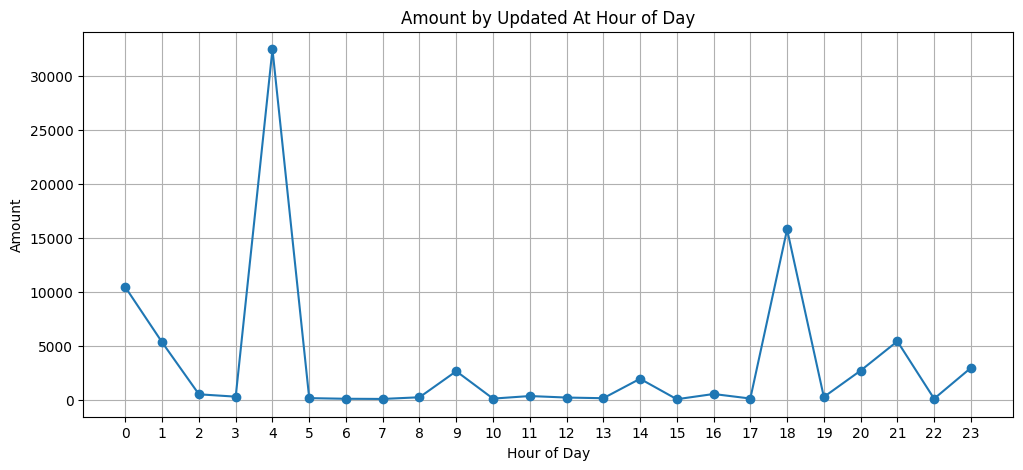

In [72]:
payments["updated_at_hour"] = payments["updated_at"].dt.hour

hourly_pattern = payments.groupby("updated_at_hour")["Amount"].sum()

plt.figure(figsize=(12, 5))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker="o")

plt.xlabel("Hour of Day")
plt.ylabel("Amount")
plt.title("Amount by Updated At Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

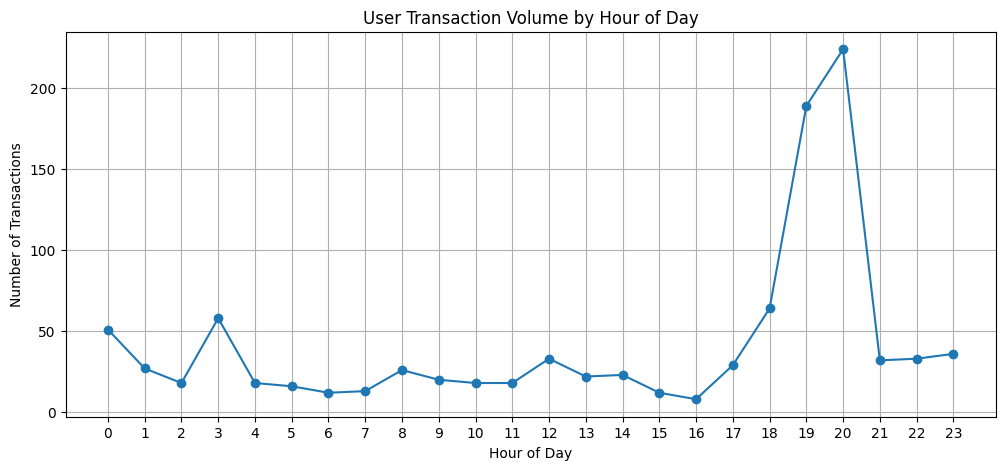

In [125]:
import matplotlib.pyplot as plt

# Extract hour from created_at
payments["hour"] = payments["created_at"].dt.hour

# Count number of transactions per hour
hourly_volume = payments.groupby("hour").size()  # counts rows per hour

# Plot
plt.figure(figsize=(12, 5))
plt.plot(hourly_volume.index, hourly_volume.values, marker="o")

plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.title("User Transaction Volume by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


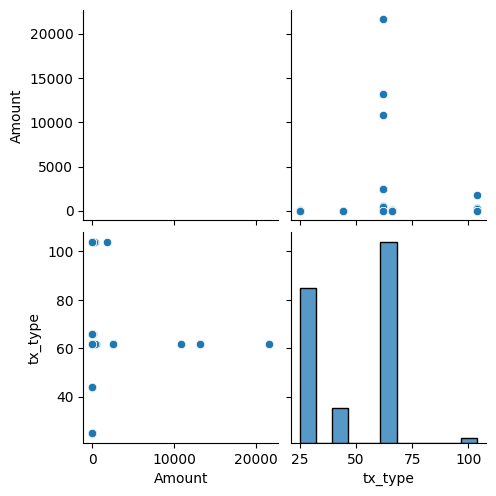

In [41]:
import seaborn as sns
sns.pairplot(payments[['Amount','tx_type']])

In [27]:
payments.describe()

,user_id,Amount,created_at,updated_at,status,tx_type,payment_type_id,card_type_id,require_3ds,threeds_liability_shift,is_rerouted,is_scheme_token,is_dine_in,transaction_date
count,1.000000e+03,1000.000000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.00000,511.0,365.0,511.000000,511.000000,0.0,1000
mean,9.167005e+07,82.707671,2025-07-01 15:04:06.877999872,2025-07-01 15:04:09.655000064,2.443000,47.518000,1.484664e+08,52.69100,0.0,0.0,0.011742,0.307241,NaN,2025-07-01 00:00:00
min,1.262130e+05,0.000000,2025-07-01 00:00:45,2025-07-01 00:00:46,2.000000,25.000000,2.227174e+06,1.00000,0.0,0.0,0.000000,0.000000,NaN,2025-07-01 00:00:00
25%,6.211389e+06,0.000000,2025-07-01 09:32:52.750000128,2025-07-01 09:32:53.500000,2.000000,25.000000,6.744831e+07,1.00000,0.0,0.0,0.000000,0.000000,NaN,2025-07-01 00:00:00
50%,2.978795e+07,0.490000,2025-07-01 19:03:47,2025-07-01 19:03:48.500000,2.000000,62.000000,1.619771e+08,2.00000,0.0,0.0,0.000000,0.000000,NaN,2025-07-01 00:00:00
75%,1.727206e+08,2.500000,2025-07-01 20:20:48.500000,2025-07-01 20:20:49.249999872,3.000000,66.000000,2.274237e+08,105.00000,0.0,0.0,0.000000,1.000000,NaN,2025-07-01 00:00:00
max,4.502786e+08,21600.000000,2025-07-01 23:59:52,2025-07-01 23:59:52,3.000000,104.000000,2.855882e+08,139.00000,0.0,0.0,1.000000,1.000000,NaN,2025-07-01 00:00:00
std,1.113414e+08,911.260279,NaN,NaN,0.496989,19.539331,9.242053e+07,52.63573,0.0,0.0,0.107827,0.461802,NaN,NaN


Need to build understanding about:
1. require_3ds (Quantum?)

In [28]:
payments['user_id'].nunique()

977

In [35]:
payments['currency'].value_counts()/len(payments)

,count
currency,
SGD,0.894
PHP,0.041
MYR,0.041
VND,0.022
IDR,0.001
KHR,0.001
